<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install pandas seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# МЛ Практика 3: Задача классификации

## Цель занятия
- EDA для номинальных переменных
- Стандартизация и encoder
- Понять задачу классификации
- Построить базовые модели для задачи классификации
- Разобрать метрики качества

## Задача классификации

Задача классификации - одна из задач машинного обучения, цель которой, отнесение одно из объектов к определенному классу, например:
- `болен, здоров`
- `кошка, собака, слон`
- `спам, не спам`

По видам разделяю несколько типов задач классификации
- `бинарная` ```[0, 1]```
- `мультиклассовая` ```[холодно, жарко, тепло, прохладно, ...]```

In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [86]:
# сразу обозначаем признаки, которые мы используем

df.quality = df.quality.astype('category')
df['type'] = df['type'].astype('category')

### Дополнение к EDA с анализом мультиклассовых перменных

Проверим связи между quality и вин с высоким и низкии содержанием алкоголя

In [87]:
# для начала бинаризируем алкголь
df['alcohol_level'] = df['alcohol'].apply(
    lambda x: 'high' if x > df['alcohol'].median() else 'low'
)

In [88]:
df.alcohol_level

0        low
1        low
2        low
3        low
4        low
        ... 
6492    high
6493     low
6494     low
6495    high
6496    high
Name: alcohol_level, Length: 6497, dtype: object

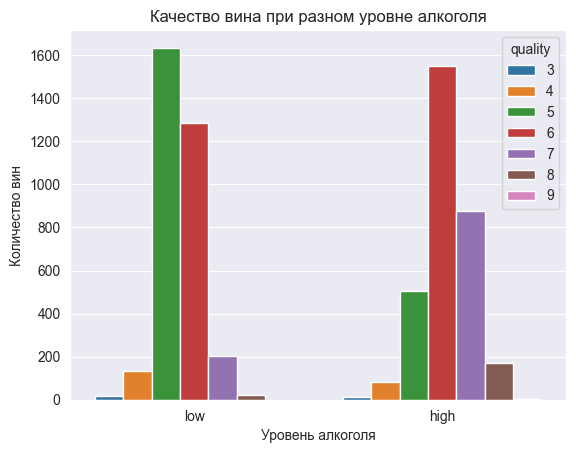

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# визуализируем различия alcohol_level и quality
sns.countplot(data=df, x='alcohol_level', hue='quality')
plt.title('Качество вина при разном уровне алкоголя')
plt.xlabel('Уровень алкоголя')
plt.ylabel('Количество вин')
plt.show()


Видно, что в
- `low_level_alcohol` больше некачественных вин
- `hight_level_alcohol` более качественные вина

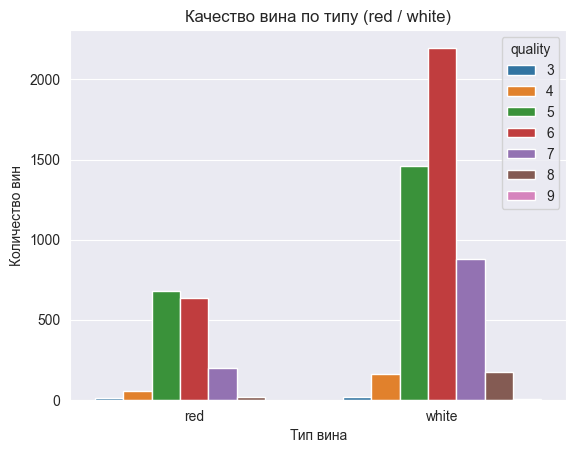

In [90]:
# визуализируем различия type и quality
sns.countplot(data=df, x='type', hue='quality')
plt.title('Качество вина по типу (red / white)')
plt.xlabel('Тип вина')
plt.ylabel('Количество вин')
plt.show()


Видим, что в белых винах, больше качественных вин, нежели в красном.
Но важно учитывать, что баланс классов неравномерен.

In [91]:
table = pd.crosstab(df['alcohol_level'], df['quality'])
table

quality,3,4,5,6,7,8,9
alcohol_level,,,,,,,
high,14,84,503,1549,878,169,5
low,16,132,1635,1287,201,24,0


Проанализируем зависимость двух категориальных переменных численным методом

χ² (хи-квадрат) — проверка наличия зависимости

Тест (хи-квадрат) отвечает на вопрос, `Есть ли вообще связь между переменными, или это просто случайность?`

Интерпретация:

`p < 0.05` → зависимость есть (значимая)

`p ≥ 0.05` → зависимость не доказана

In [92]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")


χ² = 1171.98
p-value = 5.5473034135482754e-250


**расчет хи-квадрат пошагово**

Ожидаемое значение (если зависимость отсутствует):

$$
E_{ij} = \frac{R_i \cdot C_j}{N}
$$

где  
\( R_i \) — сумма по строке (например, high / low),  
\( C_j \) — сумма по столбцу (качество j),  
\( N \) — общее количество наблюдений.

Вклад каждой ячейки в χ²:

$$
\chi^2_{ij} = \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Общая статистика:

$$
\chi^2 = \sum_{i \in \{high,\, low\}} \sum_{j \in \{3,4,5,6,7,8,9\}} \chi^2_{ij}
$$

Для наших данных:  
(\R_{high}=3202,\; \R_{low}=3295,\; \N=6497 \)

---

Расчёты по каждой комбинации

#### quality = 3  (C = 30)
- **high:**  \( O=14,\; E=14.785 \) → \( (O-E)=-0.785 \) → \( \chi^2=0.042 \)  
- **low:**   \( O=16,\; E=15.215 \) → \( (O-E)=+0.785 \) → \( \chi^2=0.041 \)

#### quality = 4  (C = 216)
- **high:**  \( O=84,\; E=106.454 \) → \( (O-E)=-22.454 \) → \( \chi^2=4.736 \)  
- **low:**   \( O=132,\; E=109.546 \) → \( (O-E)=+22.454 \) → \( \chi^2=4.602 \)

#### quality = 5  (C = 2138)
- **high:**  \( O=503,\; E=1053.698 \) → \( (O-E)=-550.698 \) → \( \chi^2=287.813 \)  
- **low:**   \( O=1635,\; E=1084.302 \) → \( (O-E)=+550.698 \) → \( \chi^2=279.690 \)

#### quality = 6  (C = 2836)
- **high:**  \( O=1549,\; E=1397.702 \) → \( (O-E)=+151.298 \) → \( \chi^2=16.378 \)  
- **low:**   \( O=1287,\; E=1438.298 \) → \( (O-E)=-151.298 \) → \( \chi^2=15.915 \)

#### quality = 7  (C = 1079)
- **high:**  \( O=878,\; E=531.777 \) → \( (O-E)=+346.223 \) → \( \chi^2=225.414 \)  
- **low:**   \( O=201,\; E=547.223 \) → \( (O-E)=-346.223 \) → \( \chi^2=219.052 \)

#### quality = 8  (C = 193)
- **high:**  \( O=169,\; E=95.119 \) → \( (O-E)=+73.881 \) → \( \chi^2=57.386 \)  
- **low:**   \( O=24,\; E=97.881 \) → \( (O-E)=-73.881 \) → \( \chi^2=55.766 \)

#### quality = 9  (C = 5)
- **high:**  \( O=5,\; E=2.464 \) → \( (O-E)=+2.536 \) → \( \chi^2=2.609 \)  
- **low:**   \( O=0,\; E=2.536 \) → \( (O-E)=-2.536 \) → \( \chi^2=2.536 \)

---

#### Итог

$$
\chi^2 = 1171.98,\qquad df = (2-1)\times(7-1) = 6
$$

**Вывод:** наблюдаемые частоты сильно отличаются от ожидаемых,  
значит, уровень алкоголя **влияет на качество вина**.


### Нормализация числовых признаков

Во многих алгоритмах машинного обучения (например, kNN, SVM, кластеризация)
результаты зависят от **расстояния между точками** в пространстве признаков.

Если один признак имеет **большие значения**, а другой — **маленькие**,  
то расстояние будет зависеть почти только от **крупных чисел**,
а маленькие признаки почти не влияют на результат.


In [93]:
df[['fixed acidity', 'chlorides']]

,fixed acidity,chlorides
0,7.4,0.076
1,7.8,0.098
2,7.8,0.092
3,11.2,0.075
4,7.4,0.076
...,...,...
6492,6.2,0.039
6493,6.6,0.047
6494,6.5,0.041
6495,5.5,0.022


Мы сравниваем два признака:
- `fixed acidity` — значения около 7–11  
- `chlorides` — значения около 0.02–0.10  

Посмотрим на их диапазоны:

| Признак | Минимум | Максимум | Диапазон |
|----------|----------|----------|----------|
| fixed acidity | 4.6 | 15.9 | **≈ 11.3** |
| chlorides | 0.012 | 0.611 | **≈ 0.6** |

---

#### Что это значит

Когда алгоритм (например, kNN) вычисляет расстояние между точками, он использует формулу:

$$
distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

Если один признак (`fixed acidity`) измеряется в **десятках**, а другой (`chlorides`) в **сотых долях**,  
то **вклад acidity в расстояние будет в сотни раз больше**,  
и модель почти не "увидит" влияние хлоридов.

---

#### Пример без нормализации

| Объект | fixed acidity | chlorides |
|---------|----------------|-----------|
| A | 7.4 | 0.076 |
| B | 11.2 | 0.075 |

Расстояние:

$$
\sqrt{(11.2 - 7.4)^2 + (0.075 - 0.076)^2} = \sqrt{14.44 + 0.000001} \approx 3.8
$$

Почти всё расстояние определяется **fixed acidity**,  
вклад **chlorides** фактически равен нулю.

#### После нормализации (в шкалу 0–1)

| Объект | fixed acidity (норм.) | chlorides (норм.) |
|---------|------------------------|-------------------|
| A | 0.26 | 0.10 |
| B | 0.61 | 0.09 |

Теперь расстояние:

$$
\sqrt{(0.61 - 0.26)^2 + (0.09 - 0.10)^2} = \sqrt{0.1225 + 0.0001} \approx 0.351
$$

Теперь **оба признака** участвуют в расчёте,  
и модель учитывает влияние **и кислотности, и хлоридов**.

`Главная идея нормализации - сделать признаки сопоставимыми по масштабу`


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Берем только числовые признаки
num_cols = df.select_dtypes(include='number').columns.tolist() + ['quality']
X = df[num_cols].drop(columns=['quality'])
y = df['quality']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 1. Модель без нормализации ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw) # точность

# --- 2. Модель после нормализации ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled) # точность

acc_raw, acc_scaled

(0.4774358974358974, 0.5379487179487179)

### Методы нормализации числовых признаков

##### MinMaxScaler  
**Формула:**

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

- Приводит значения признака к диапазону **[0, 1]**.  
- Сохраняет **форму распределения** (но “сжимает” диапазон).  

**Когда использовать:**  
- Когда признаки имеют **ограниченные значения**  
(например, проценты, физические величины, интенсивность пикселей).  
- Хорошо подходит для **алгоритмов, основанных на расстояниях** —  
*kNN, K-Means, SVM*.  

**Недостаток:** чувствителен к выбросам (сильно смещают масштаб).

---

##### StandardScaler  
**Формула:**

$$
x' = \frac{x - \mu}{\sigma}
$$

где  
\($\mu$) — среднее значение признака,  
\($\sigma\$) — стандартное отклонение.

- Приводит признак к **нулевому среднему** и **единичному стандартному отклонению**.(mean=0, std=1)
- Значения распределены вокруг 0, могут быть отрицательными.

**Когда использовать:**  
- Когда данные имеют **нормальное распределение**.  
- Для **линейных моделей** и **нейронных сетей**  
(логистическая регрессия, SVM, PCA, нейросети).  

**Недостаток:** если распределение сильно скошено или есть выбросы — масштаб может быть искажён.

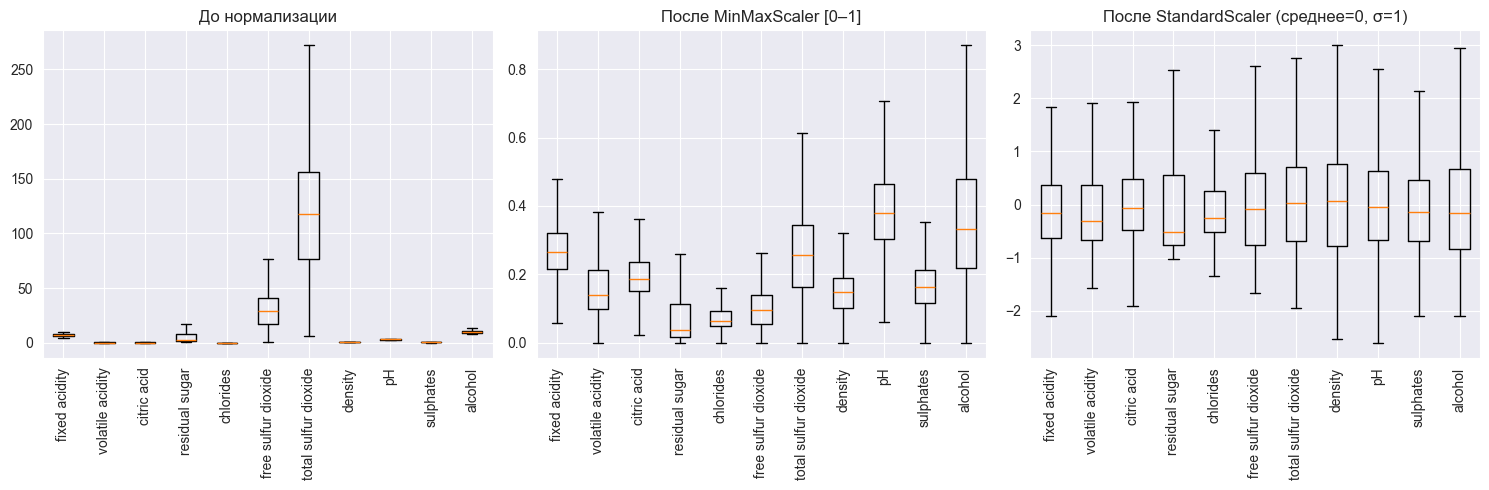

In [95]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Берем все числовые признаки
num_df = df.select_dtypes(include=[int, float]).copy()

# --- Применяем два метода нормализации ---
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns=num_df.columns)
std_scaled = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].boxplot(num_df.values, showfliers=False)
axes[0].set_title("До нормализации")
axes[0].set_xticks(range(1, len(num_df.columns)+1))
axes[0].set_xticklabels(num_df.columns, rotation=90)

axes[1].boxplot(minmax_scaled.values, showfliers=False)
axes[1].set_title("После MinMaxScaler [0–1]")
axes[1].set_xticks(range(1, len(num_df.columns)+1))
axes[1].set_xticklabels(num_df.columns, rotation=90)

axes[2].boxplot(std_scaled.values, showfliers=False)
axes[2].set_title("После StandardScaler (среднее=0, σ=1)")
axes[2].set_xticks(range(1, len(num_df.columns)+1))
axes[2].set_xticklabels(num_df.columns, rotation=90)

plt.tight_layout()
plt.show()


### Задача классификации

In [96]:
y = df['quality']
X = df.drop(columns=['quality', 'alcohol']) # есть переменная alcohol_level
X.alcohol_level = X.alcohol_level.astype('category')

In [97]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,type,alcohol_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,red,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,white,high
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,white,low
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,white,low
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,white,high


In [98]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# --- 1. Разделяем признаки на числовые и не числовые ---
num_cols = df.select_dtypes(include=['float64']).columns.tolist()     # числовые
cat_label = ['type']                                                  # для LabelEncoder
cat_onehot = ['alcohol_level']                                        # для OneHotEncoder

# --- 2. Кодирование категориальных признаков ---
# LabelEncoder для признака "type"
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])  # red→0, white→1, например

# OneHotEncoder для alcohol_level
ohe = OneHotEncoder(sparse_output=False)  # drop='first' убирает лишнюю колонку
alcohol_encoded = pd.DataFrame(
    ohe.fit_transform(df[['alcohol_level']]),
    columns=ohe.get_feature_names_out(['alcohol_level'])
)

# Объединяем всё в один датафрейм
X = pd.concat([df[num_cols], df['type_encoded'], alcohol_encoded], axis=1)

# --- 3. Нормализация числовых признаков ---
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- 4. Проверим результат ---
print("Форма данных после преобразований:", X.shape)
X.head()


Форма данных после преобразований: (6497, 14)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_encoded,alcohol_level_high,alcohol_level_low
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0,0.0,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0,0.0,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0,0.0,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0,0.0,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0,0.0,1.0


#### Моделирование

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
# объявим модель
model = LogisticRegression(
    penalty=None, # регуляризация (добавление штрафа за большие коэффициенты)
    random_state=42,
)

#### Логистическая регрессия

На графиках показано различие между ```логистической регрессией``` и `линейной регрессией`

![1](https://ucarecdn.com/408b9305-81ef-4677-9c54-cc35679a632e/)

#### Как работает логистическая регрессия

Логистическая регрессия — это способ **предсказывать, к какой категории относится объект**.
Если обычная (бинарная) логистическая регрессия решает вопрос «да или нет»,
то **мультиклассовая** — это уже выбор **из нескольких вариантов**.

Пример:

> По температуре, давлению и влажности предсказать —
> **солнечно ☀️**, **дождливо 🌧** или **пасмурно 🌫**.

---

##### Как это работает

Для каждого класса (солнечно, дождливо, пасмурно) она считает своё число — так называемую «уверенность».
   Это делается по формуле:

$$
z_i = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

где:

* (x) — это признаки (температура, давление и т. д.),
* (w) — веса, которые модель подбирает при обучении.

3. Получаются три числа — по одному для каждого класса.
   Например:

   * Солнечно → 2.1
   * Дождливо → 0.8
   * Пасмурно → 0.3

4. Теперь нужно превратить эти числа в **вероятности**, чтобы понять, какой вариант наиболее вероятен.

---

##### Функция Softmax — превращает «уверенности» в вероятности

Формула:

$$
P_i = \frac{e^{z_i}}{\sum e^{z_k}}
$$

Если просто словами:

* мы берём экспоненту от каждого значения ($z_i$),
* делим её на сумму всех экспонент,
* и получаем вероятности, которые в сумме дают **1**.

Пример:

| Тип погоды  | Уверенность | Вероятность |
| ----------- | ----------- | ----------- |
| Солнечно | 2.1         | 0.65        |
| Дождливо | 0.8         | 0.25        |
| Пасмурно | 0.3         | 0.10        |

Вероятнее всего — **солнечно (65%)**».

---

## Как модель учится

Когда мы показываем модели примеры (температура, давление и реальный тип погоды):

1. Она делает свои предсказания.
2. Сравнивает их с правильными ответами.
3. Считает ошибку (насколько сильно ошиблась) с использованием функции-потерь (log-loss).
4. Меняет веса так, чтобы в следующий раз предсказать точнее.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from ipywidgets import interact, IntSlider

# --- Softmax ---
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# --- Логистическая регрессия с сохранением истории ---
def train_logreg(X, y, learning_rate=0.3, max_iter=150):
    X = np.c_[np.ones(X.shape[0]), X.values]
    classes = np.unique(y)
    y_encoded = np.eye(len(classes))[np.searchsorted(classes, y)]
    W = np.zeros((X.shape[1], len(classes)))

    W_hist, loss_hist = [], []
    for i in range(max_iter):
        scores = X @ W
        probs = softmax(scores)
        loss = -np.mean(np.sum(y_encoded * np.log(probs + 1e-15), axis=1))
        grad = X.T @ (probs - y_encoded) / X.shape[0]
        W -= learning_rate * grad

        W_hist.append(W.copy())
        loss_hist.append(loss)
    return W_hist, loss_hist

# --- Обучение ---
W_hist, loss_hist = train_logreg(X, y, learning_rate=0.005, max_iter=150)

# --- Интерактивная визуализация ---
# Z


In [102]:
import numpy as np

arr_z = np.array([[1, 2, 3, 4],]) # представим, что модель дала оценки z под каждый класс

softmax(arr_z) # тогда пребразуем это в вероятности P(z)

array([[0.0320586 , 0.08714432, 0.23688282, 0.64391426]])

#### Предсказывание y

In [103]:
y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной

# Без stratify — случайное разделение:
# могло бы получиться, что в тесте вообще нет классов 3 или 9,
# и модель не сможет их предсказывать.

In [105]:
model.fit(X_train, y_train)

C:\python\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[2.09535927e-03, 7.89579424e-03, 9.98676298e-02, ...,
        3.06478962e-01, 1.18387871e-01, 2.71595771e-03],
       [1.54286207e-03, 2.27487270e-03, 3.03118041e-01, ...,
        1.01398850e-01, 6.24576489e-03, 1.32185233e-05],
       [2.79675674e-03, 1.42351598e-02, 5.41105881e-01, ...,
        4.51947141e-02, 8.22977501e-03, 5.06757163e-05],
       ...,
       [9.33734495e-03, 1.58437698e-01, 4.03275134e-01, ...,
        5.70429326e-02, 7.12575425e-03, 2.78256988e-03],
       [5.87596578e-03, 6.38638531e-02, 5.64932213e-01, ...,
        3.24557861e-02, 5.31499865e-03, 7.83695588e-05],
       [2.04960749e-03, 1.27951887e-02, 1.12655195e-01, ...,
        3.01882550e-01, 5.53635591e-02, 2.71148223e-03]], shape=(1950, 7))

In [52]:
for i in range(10):
  print([round(float(item), 2) for item in list(y_pred_proba[i] * 100)])

[0.21, 0.79, 9.99, 46.26, 30.65, 11.84, 0.27]
[0.15, 0.23, 30.31, 58.54, 10.14, 0.62, 0.0]
[0.28, 1.42, 54.11, 38.84, 4.52, 0.82, 0.01]
[0.03, 0.16, 2.28, 44.65, 46.16, 6.59, 0.13]
[0.71, 8.53, 18.59, 45.88, 23.17, 2.79, 0.32]
[2.19, 19.55, 9.76, 25.6, 38.83, 3.72, 0.34]
[0.48, 1.81, 22.77, 55.97, 18.33, 0.59, 0.05]
[0.29, 0.93, 10.91, 47.51, 31.3, 8.77, 0.29]
[0.23, 0.44, 20.24, 60.14, 17.77, 1.14, 0.04]
[0.33, 2.6, 15.07, 45.87, 27.01, 8.79, 0.34]


In [53]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

In [54]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [55]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        # Если многоклассовая классификация — One-vs-Rest
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }


In [56]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  0.5540
Precision: 0.5373
Recall:    0.5540
F1-score:  0.5162
ROC-AUC:   0.7903

Confusion Matrix:
[[   0    3    9    9    0    0    0]
 [   0   12   84   55    0    0    0]
 [   0    5  910  576    5    0    0]
 [   0    0  435 1469   79    2    0]
 [   0    0   51  576  128    0    0]
 [   0    0   10   96   29    0    0]
 [   0    0    0    1    3    0    0]]


In [57]:
metrics = evaluate_classification(y_test, y_pred, y_proba)


=== Метрики классификации ===
Accuracy:  0.5303
Precision: 0.5309
Recall:    0.5303
F1-score:  0.4948
ROC-AUC:   0.7300

Confusion Matrix:
[[  0   0   4   3   1   1   0]
 [  0   3  34  27   1   0   0]
 [  0   1 346 294   0   1   0]
 [  0   0 200 622  29   0   0]
 [  0   0  15 246  63   0   0]
 [  0   0   5  40  13   0   0]
 [  0   0   0   0   1   0   0]]


### Про метрики

![d](https://streammydata.ru/wp-content/uploads/2024/09/Recall-Precision.png)

https://loginom.ru/blog/classification-quality

Возьмём пример:

* **Истинные (y_true):** [1, 1, 0, 1]
* **Предсказанные (y_pred):** [1, 1, 1, 1]

---

##### Confusion Matrix (Матрица ошибок)

|                  | **Предсказано = 1** | **Предсказано = 0** |
| ---------------- | ------------------- | ------------------- |
| **Истинное = 1** | TP = 3              | FN = 0              |
| **Истинное = 0** | FP = 1              | TN = 0              |

**1. Формула:**

$$
[
\text{Confusion Matrix} =
\begin{bmatrix}
TN & FP \
FN & TP
\end{bmatrix}
]
$$

**2. Что показывает:**
Ошибки модели: сколько примеров верно/неверно классифицировано по каждому классу.

**3. Использование:**
Базовый инструмент для анализа — от него рассчитываются все остальные метрики.

---

##### Accuracy (Точность классификации)

1. **Формула:**

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

2. **Смысл:**
   Доля правильно классифицированных объектов.

3. **Когда использовать:**

* Когда классы **сбалансированы**.
* Хорошо подходит для симметричных задач (FP и FN одинаково важны).

4. **Когда неэффективна:**

* При **дисбалансе классов** (например, 95% “0” и 5% “1”).

5. **Пример:**

$$
Accuracy = \frac{3 + 0}{3 + 0 + 1 + 0} = \frac{3}{4} = 0.75
$$

**Accuracy = 0.75**

---

#####  Precision (Точность положительных предсказаний)

1. **Формула:**

$$
Precision = \frac{TP}{TP + FP}
$$

2. **Смысл:**
   Какой процент предсказанных положительных действительно положительные.

3. **Когда использовать:**

* Когда **важно избегать ложных positive (FP)**.
Пример: фильтр спама, система блокировки.

4. **Когда неэффективна:**

* Если важнее не пропустить реальные “1” (лучше использовать Recall).

5. **Пример:**

$$
Precision = \frac{3}{3 + 1} = 0.75
$$

**Precision = 0.75**

---

## Recall (Полнота, чувствительность)

1. **Формула:**

$$
Recall = \frac{TP}{TP + FN}
$$

2. **Смысл:**
   Какую долю настоящих положительных модель нашла.

3. **Когда использовать:**

* Когда **важно не пропустить** положительный пример.
Пример: медицинский диагноз, детекция мошенничества.

4. **Когда неэффективна:**

* Если ложные тревоги (FP) критичны.

5. **Пример:**

$$
Recall = \frac{3}{3 + 0} = 1.0
$$

**Recall = 1.00**

---

## F1-score (Среднее гармоническое между Precision и Recall)

1. **Формула:**

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

2. **Смысл:**
   Баланс между точностью и полнотой.
   Ближе к 1 → модель сбалансирована, ближе к 0 → проблемы с FP или FN.

3. **Когда использовать:**

При **дисбалансе классов**, когда важен компромисс.

4. **Когда неэффективен:**
-

5. **Пример:**

$$
F1 = 2 \cdot \frac{0.75 \cdot 1.0}{0.75 + 1.0} = 0.857
$$

**F1-score = 0.857**

---

## ROC-AUC (Receiver Operating Characteristic — Area Under Curve)

1. **Формула (концептуально):**

$$
AUC = \int_0^1 TPR(FPR) , dFPR
$$

где
$$
TPR = \frac{TP}{TP + FN}, \quad FPR = \frac{FP}{FP + TN}
$$

2. **Смысл:**
   Измеряет **способность модели различать классы**, независимо от выбранного порога вероятности.

3. **Когда использовать:**
Для **сравнения нескольких моделей** на уровне качества ранжирования.

4. **Когда неэффективна:**
При **сильном дисбалансе** классов → лучше использовать **PR-AUC**.

5. **Пример:**
   Если модель предсказывает всё как “1”, TPR=1, FPR=1 →
   [
   AUC = 0.5
   ]
   (модель не различает классы)

**ROC-AUC = 0.5**
